In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from numpy import linalg as la

In [2]:
%matplotlib notebook

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

<IPython.core.display.Javascript object>


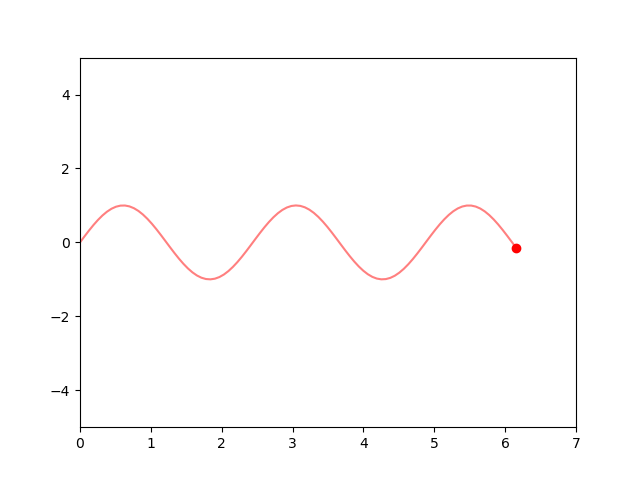

In [3]:
# Compute the data to plot 
t = np.arange(0,100)
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x + t/10)

# Create figure and set limits 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 7))
ax.set_ylim((-5, 5))

# Create empty line objects 
particle, = plt.plot([], [], marker = 'o', color = 'r')
traj, = plt.plot([], [], color = 'r', alpha = 0.5)

# Update the position of the particle 
def update(i):
        particle.set_data(x[i], y[i])
        traj.set_data(x[:i+1], y[:i+1])
        return particle, traj

# Create and show the animation 
ani = animation.FuncAnimation(fig, update, frames = range(100), interval = 25)
plt.show()

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


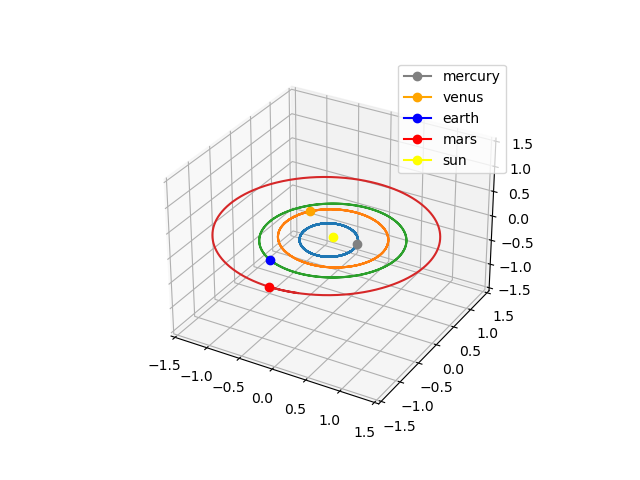

In [4]:
# Load in data and initialize labeling lists
data = np.load("orbits.npz")
planets, colors = ["mercury", "venus", "earth", "mars"], ["gray", "orange", "blue", "red"]

# Create figure and set axis limits 
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

# Loop through each planet and add it to the plot 
for planet, color in zip(planets, colors):
    x = data[planet][:, 0]
    y = data[planet][:, 1]
    z = data[planet][:, 2]
    
    ax.plot3D(x, y, z)
    ax.plot3D(x[0], y[0], z[0], marker = "o", color = color, label = planet)

# Add the sun and show the plot 
ax.plot3D(0, 0, 0, marker = "o", color = "yellow", label = "sun")
plt.legend()
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4". Embed you anumated plot.

In [5]:
# Use ffmpeg to embed object and load in data
animation.writer = animation.writers['ffmpeg']
plt.ioff() 
data = np.load("orbits.npz")

# Filter data down by planet 
mercury, venus, earth, mars = data["mercury"], data["venus"], data["earth"], data["mars"]
mer_x, mer_y, mer_z = mercury[:, 0], mercury[:, 1], mercury[:, 2]
ven_x, ven_y, ven_z = venus[:, 0], venus[:, 1], venus[:, 2]
e_x, e_y, e_z = earth[:, 0], earth[:, 1], earth[:, 2]
mars_x, mars_y, mars_z = mars[:, 0], mars[:, 1], mars[:, 2]

# Create figure and set axis limits 
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

# Create empty 3d objects for each planet 
particle_mer, = plt.plot([], [], [], marker = 'o', color = 'gray', label = "Mercury")
traj_mer, = plt.plot([], [], [], color = 'gray', alpha = 0.5)

particle_ven, = plt.plot([], [], [], marker = 'o', color = 'orange', label = "Venus")
traj_ven, = plt.plot([], [], [], color = 'orange', alpha = 0.5)

particle_e, = plt.plot([], [], [], marker = 'o', color = 'blue', label = "Earth")
traj_e, = plt.plot([], [], [], color = 'blue', alpha = 0.5)

particle_mars, = plt.plot([], [], [], marker = 'o', color = 'r', label = "Mars")
traj_mars, = plt.plot([], [], [], color = 'r', alpha = 0.5)

# Update the position of each planet 
def update(i):
    particle_mer.set_data(mer_x[i], mer_y[i])
    traj_mer.set_data(mer_x[:i+1], mer_y[:i+1])
    particle_mer.set_3d_properties(mer_z[i])
    traj_mer.set_3d_properties(mer_z[:i+1])
    
    particle_ven.set_data(ven_x[i], ven_y[i])
    traj_ven.set_data(ven_x[:i+1], ven_y[:i+1])
    particle_ven.set_3d_properties(ven_z[i])
    traj_ven.set_3d_properties(ven_z[:i+1])
    
    particle_e.set_data(e_x[i], e_y[i])
    traj_e.set_data(e_x[:i+1], e_y[:i+1])
    particle_e.set_3d_properties(e_z[i])
    traj_e.set_3d_properties(e_z[:i+1])
    
    particle_mars.set_data(mars_x[i], mars_y[i])
    traj_mars.set_data(mars_x[:i+1], mars_y[:i+1])
    particle_mars.set_3d_properties(mars_z[i])
    traj_mars.set_3d_properties(mars_z[:i+1])
    
    return particle_mer, traj_mer, particle_ven, traj_ven, particle_e, traj_e, particle_mars, traj_mars

ax.plot3D(0, 0, 0, marker = "o", color = "yellow", label = "sun")

# Save the animation 
ani = animation.FuncAnimation(fig, update, frames = range(1400), interval = 10)
ani.save('my_animation.mp4')

<video src="my_animation.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

<IPython.core.display.Javascript object>


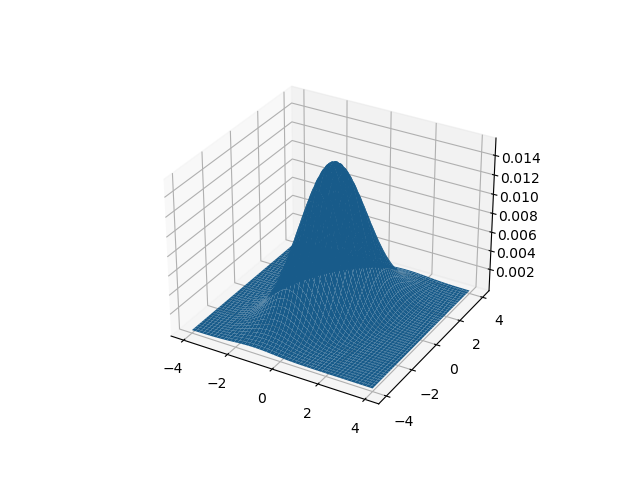

In [7]:
# This is the bivariate function 
def bivariate_pdf(x, y):
    sigma = np.array([[1, 3/5], [3/5, 2]])
    return (1/la.det(2*np.pi*sigma))*(np.exp(-.5*(np.array([x,y]).T@la.inv(sigma)@np.array([x,y]))))

# Create figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

# Create matricies for X and Y
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)

# Vectorize the bivariate function and create Z
bivariate_pdf_vectorized = np.vectorize(bivariate_pdf)
Z = bivariate_pdf_vectorized(X, Y)

# Show the plot 
ax.plot_surface(X, Y, Z)
plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation as `vibration.mp4`.

In [12]:
animation.writer = animation.writers['ffmpeg']
plt.ioff() 

# Load in data and filter data
data = np.load("vibration.npz")
X, Y, Z = data["X"], data["Y"], data["Z"]

# Create plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

# Update the surface 
def update(i):
    ax.clear()
    ax.plot_surface(X, Y, Z[i,:,:], cmap = "plasma")
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 3)
    ax.set_zlim(-3, 3)

# Create and save animation 
ani = animation.FuncAnimation(fig, update, frames = range(150), interval = 20)
ani.save('surface_ani.mp4')

<video src="surface_ani.mp4" controls>